# Exploring Nobel Prize Winners

In this project, I explore a dataset of Nobel Prize laureates to highlight some trends in the manner the prizes are awarded.

The idea and dataset for this project are from [this DataCamp project](https://app.datacamp.com/learn/projects/visualizing_the_history_of_nobel_prize_winners/guided/Python).

## Load and inspect data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and inspect data
df = pd.read_csv('nobel.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
year                    1000 non-null int64
category                1000 non-null object
prize                   1000 non-null object
motivation              912 non-null object
prize_share             1000 non-null object
laureate_id             1000 non-null int64
laureate_type           1000 non-null object
full_name               1000 non-null object
birth_date              968 non-null object
birth_city              964 non-null object
birth_country           969 non-null object
sex                     970 non-null object
organization_name       736 non-null object
organization_city       735 non-null object
organization_country    735 non-null object
death_date              596 non-null object
death_city              579 non-null object
death_country           585 non-null object
dtypes: int64(2), object(16)
memory usage: 140.7+ KB
None


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## What is the most commonly awarded gender and birth country?

In [20]:
# Most commonly awarded gender and birth country
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]

print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded country:", top_country)

Most commonly awarded gender: Male
Most commonly awarded country: United States of America


## Which decade has the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Let's create a **US-born** and **decade** columns. Then we find the mean of the **US-born** column (i.e. the ratio of US-born winners to all winners) by **decade**.

In [21]:
# Decade with the highest ratio of US-born to total winners
df["US-born"] = df['birth_country'] == 'United States of America'
df["decade"] = (df["year"] // 10) * 10
max_decade_usa = df.groupby("decade")["US-born"].mean().sort_values(ascending=False).index[0]
print(f"Decade with the highest ratio of US-born to total winners: {max_decade_usa}s.")

Decade with the highest ratio of US-born to total winners: 2000s.


Let's visualize the proportions of US-born winners across decades

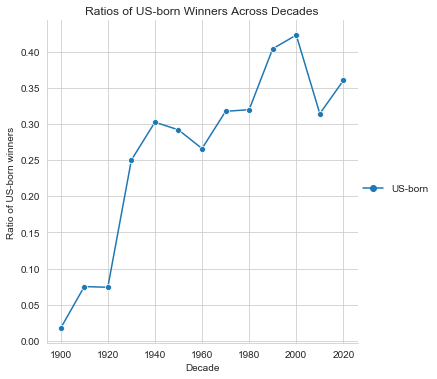

In [13]:
us_win_decades = df.groupby("decade")["US-born"].mean().to_frame()

sns.set_style("whitegrid")
sns.relplot(data=us_win_decades, kind="line", markers="o")

plt.title("Ratios of US-born Winners Across Decades")
plt.ylabel("Ratio of US-born winners")
plt.xlabel("Decade");

We see that the 2000s have the highest proportion of US-born Nobel laureates. Also, there's been a general upward trend in the proportion of US-born winners since the first set of Nobel Prizes were awarded.

## Which decade and Nobel Prize category combination have the highest proportion of female laureates?

Let's create an **is_female** column. Then we find the mean of this column grouped by **decade** and **category**.

In [11]:
df["is_female"] = df["sex"] == "Female"

category, decade = df.groupby(["decade", "category"])["is_female"].mean().sort_values(ascending=False).index[0]
max_female_dict = {decade: category}
max_female_dict

{'Literature': 2020}

Let's visualize the proportions of female laureates across decades and categories.

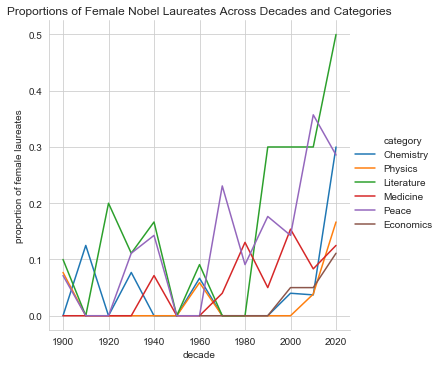

In [15]:
data = df.groupby(["decade", "category"])["is_female"].mean().sort_values().to_frame().reset_index()

sns.set_style("whitegrid")
sns.relplot(data=data, x="decade", y="is_female", hue="category", kind="line")

plt.title("Proportions of Female Nobel Laureates Across Decades and Categories")
plt.ylabel("proportion of female laureates")
plt.xlabel("decade");

We see that the combination of category and decade with the highest ratio of female Nobel laureates is Literature and the 2020s. It seems that, since the 1990s, women have been doing well in the Literature category. Women have also done pretty well in the Peace category.

## Who was the first woman to receive a Nobel Prize, and in what category?

In [22]:
female_laureates = df[df["is_female"]].reset_index()

name = female_laureates.loc[0, "full_name"]
category = female_laureates.loc[0, "category"]
year = female_laureates.loc[0, "year"]

print(f"{name}, who won the prize for {category} in {year}, is the first female Nobel laureate.")

Marie Curie, née Sklodowska, who won the prize for Physics in 1903, is the first female Nobel laureate.


## Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [34]:
repeated = df["full_name"].value_counts() > 1
repeat_list = repeated[repeated].index.to_list()

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'John Bardeen']